# Task 1



The data set file contains following features:

1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4. Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve. 
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve. 
9. Class 

## Model

**REMEMBER TO NORMALIZE THE DATA**

### May I use ensemble?

The data set is small. So it's not recommended to use the ensemble trick to do this job.

### Try XGBoost

Have a param to avoid unbalanced problem.

### Random Forest

Can it avoid this problem by nature?

### SVM

Use cose sentitive model.

And try to change the implementation to increase the penalty for positive samples


### USE GRID SEARCH




## Addressing Unbalance Problem

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

I should address the problem of **unbalance**. Positive to negative is 10 to 1.

Make a solution with a param to adjust the sample rate from Positive and Negative data

上下采样这些操作应该在切分数据集之前还是之后？

### Oversampling

### Undersampling

### SMOTE: Synthetic Minority Over-sampling Technique

https://www.jair.org/media/953/live-953-2037-jair.pdf

### Try Penalized Models

Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training. These penalties can bias the model to pay more attention to the minority class.

Often the handling of class penalties or weights are specialized to the learning algorithm. There are penalized versions of algorithms such as penalized-SVM and penalized-LDA.

It is also possible to have generic frameworks for penalized models. For example, Weka has a CostSensitiveClassifier that can wrap any classifier and apply a custom penalty matrix for miss classification.

### Fake classes

https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set

create fake classes

### Introduce noise to rare samples to oversampling



### Ensemble above



## Evaluation

Should use Cross Validation to estimate each model

### Criterion

- F1 (Asked)

Use confusion matrix to illustrate the problem




In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./HTRU2/HTRU_2.csv', header=None)

df['Class'] = df.pop(8)
y = df['Class']
X = df.drop('Class', axis=1)

# Explore


## Data Distribution

Highly unbalanced

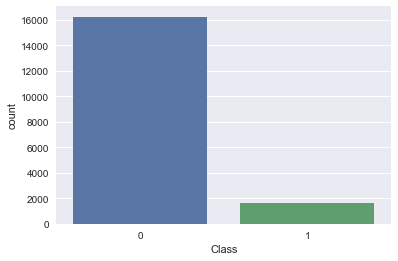

In [3]:
sns.countplot('Class', data=df)

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


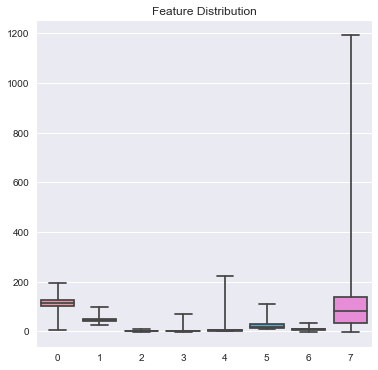

In [4]:
sns.plt.figure(figsize=(6, 6))
sns.plt.title('Feature Distribution')
sns.boxplot(X, whis=1000)

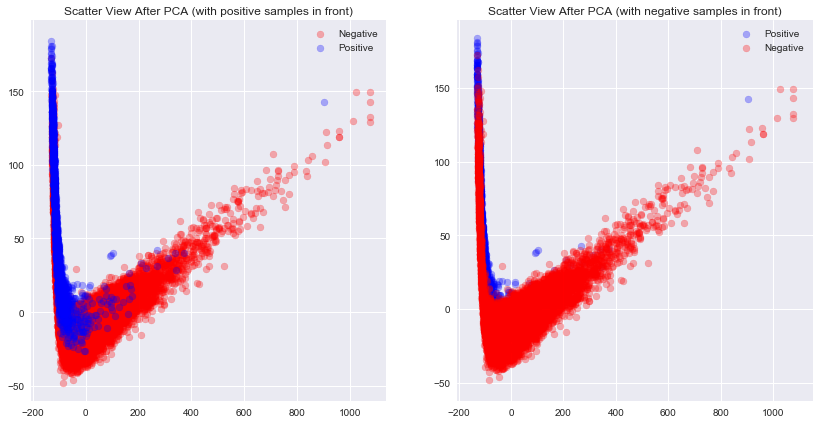

In [5]:
pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)
sns.plt.figure(figsize=(14, 7))
sns.plt.subplot(121)
sns.plt.title('Scatter View After PCA (with positive samples in front)')
sns.plt.scatter(X_2[y==0][:, 0], X_2[y==0][:, 1], c='r', alpha=0.3)
sns.plt.scatter(X_2[y==1][:, 0], X_2[y==1][:, 1], c='b', alpha=0.3)
sns.plt.legend(['Negative', 'Positive'])

sns.plt.subplot(122)
sns.plt.title('Scatter View After PCA (with negative samples in front)')
sns.plt.scatter(X_2[y==1][:, 0], X_2[y==1][:, 1], c='b', alpha=0.3)
sns.plt.scatter(X_2[y==0][:, 0], X_2[y==0][:, 1], c='r', alpha=0.3)
sns.plt.legend(['Positive', 'Negative'])

In [5]:
X.head()

,0,1,2,3,4,5,6,7
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


# Stupid Learning

In [6]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display
from preprocess import smote, upsampling, downsampling
import model
import evaluation
import imp
import seaborn as sns
evaluation = imp.reload(evaluation)
model = imp.reload(model)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
display(evaluation.estimate(model.DecisionTree(balanced_learning=False), X_train, X_test, y_train, y_test))

{'test': {'f1': 0.83349950149551344, 'roc_auc': 0.93844751069151933},
 'train': {'f1': 0.92470156106519752, 'roc_auc': 0.99845261705007138}}